## Evaluación del Potencial de los Empleados

En la gestión de recursos humanos, es crucial identificar a los empleados que representan una mayor inversión en talento para maximizar el rendimiento y minimizar la rotación. Para lograr esto, necesitamos una métrica que nos ayude a evaluar el valor de cada empleado basado en factores que afectan su potencial y contribución a la empresa.

### Objetivo

Desarrollar una métrica, denominada `Stay_Score`, que permita clasificar a los empleados en función de su valor potencial para la empresa. Este puntaje se utilizará para identificar a los empleados que son más prometedores y, por lo tanto, merecen una mayor inversión en desarrollo profesional y retención.

### Descripción del Problema

1. **Datos:**
   - **Edad (`Age`)**: Edad actual del empleado.
   - **Salario (`Salary`)**: Nivel de salario del empleado.
   - **Stay_Score**: Puntaje que combina la edad y el salario para evaluar el valor potencial del empleado.

2. **Metodología:**
   - **Normalización de Datos**: Para garantizar una comparación justa entre las características de los empleados, las variables `Age` y `Salary` se normalizan en un rango de [0, 1] utilizando MinMaxScaler.
   - **Regresión Polinómica**: Utilizamos un modelo de regresión polinómica para capturar la relación no lineal entre la edad, el salario y el `Stay_Score`. Esto nos permite entender cómo estas variables interactúan para influir en el puntaje de cada empleado.
   - **Evaluación y Visualización**: Se utiliza un gráfico 3D para visualizar la relación entre `Age`, `Salary`, y `Stay_Score`, lo que facilita la interpretación de los resultados y ayuda a identificar patrones.

3. **Cálculo del Stay_Score:**
   - **Fórmula**: El `Stay_Score` se calcula combinando la edad normalizada y el salario normalizado con pesos específicos. En este caso, se asigna un peso del 40% a la edad (invertida) y un 60% al salario. La fórmula es:
     
     Stay_Score = 0.4 * (1 - Age_Normalized) + 0.6 * Salary_Normalized
     
   - **Interpretación**: Una mayor edad normalizada reduce el `Stay_Score`, mientras que un mayor salario normalizado aumenta el `Stay_Score`. Esto sugiere que los empleados con un salario más alto y una menor edad tienen un mayor potencial.

4. **Aplicación:**
   - **Identificación de Talento**: Los empleados con un `Stay_Score` alto son aquellos que presentan un mejor perfil para inversión en su talento. Estos empleados son considerados como valiosos para el crecimiento futuro y requieren atención adicional en términos de desarrollo y retención.
   - **Decisiones Estratégicas**: El `Stay_Score` ayuda a tomar decisiones informadas sobre a quiénes ofrecer oportunidades de capacitación, promociones y otras iniciativas de desarrollo profesional.

### Conclusión

La métrica `Stay_Score` proporciona una herramienta efectiva para clasificar a los empleados según su potencial, basándose en una combinación de su edad y salario. Esta evaluación permite a la empresa concentrar sus recursos en el desarrollo de los empleados que ofrecen el mayor valor a largo plazo.


# Importar Librerias

In [7]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install openpyxl

#Generar Data

## Generar 100 000 combinaciones de nombres y apellidos aleatorios para tener data suficinte, no importa si se repiten (el punto es tener data)

In [8]:
import pandas as pd
import numpy as np
# Lista base de nombres
base_names = np.array(["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ian", "Jane",
                       "Kevin", "Laura", "Mike", "Nina", "Oscar", "Paula", "Quincy", "Rita", "Sam", "Tina",
                       "Uma", "Victor", "Wendy", "Xander", "Yara", "Zoe"])

# Generar un array gigante con 100,000 nombres aleatorios
giant_names_array = np.random.choice(base_names, size = 100)

# Crear un array de apellidos más largo
base_last_names = np.array([
    'Smith', 'Johnson', 'Williams', 'Jones', 'Brown',
    'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor',
    'Anderson', 'Thomas', 'Jackson', 'White', 'Harris',
    'Martin', 'Thompson', 'Garcia', 'Martinez', 'Robinson',
    'Clark', 'Rodriguez', 'Lewis', 'Lee', 'Walker',
    'Hall', 'Allen', 'Young', 'King', 'Wright',
    'Scott', 'Torres', 'Nguyen', 'Hill', 'Adams',
    'Baker', 'Gonzalez', 'Nelson', 'Carter', 'Mitchell',
    'Perez', 'Roberts', 'Turner', 'Phillips', 'Campbell',
    'Parker', 'Evans', 'Edwards', 'Collins', 'Stewart',
    'Sanchez', 'Morris', 'Rogers', 'Reed', 'Cook',
    'Morgan', 'Bell', 'Murphy', 'Bailey', 'Rivera',
    'Cooper', 'Richardson', 'Cox', 'Howard', 'Ward',
    'Flores', 'Butler', 'Simmons', 'Foster', 'Gonzales',
    'Bryant', 'Alexander', 'Russell', 'Griffin', 'Diaz'
])

# Rellenar un array de 100,000 registros con apellidos aleatorios
giant_last_name_array = np.random.choice(base_last_names, size = 100, replace = True)

     ID    Name Last Name  Age   Salary  Stay_Score
0     1  Quincy    Turner   39   361256    0.204380
1     2    Mike     Lewis   37   839853    0.477470
2     3     Bob  Anderson   20  1407150    0.940499
3     4    Yara    Harris   25   492427    0.407340
4     5    Nina    Bailey   46  1140678    0.551435
..  ...     ...       ...  ...      ...         ...
95   96  Xander      Ward   18  1069599    0.780373
96   97   Paula     Lewis   57  1242519    0.500731
97   98   Alice    Wilson   43   759342    0.377591
98   99   David   Collins   47  1155458    0.549757
99  100    Tina    Rogers   30   403208    0.312363

[100 rows x 6 columns]


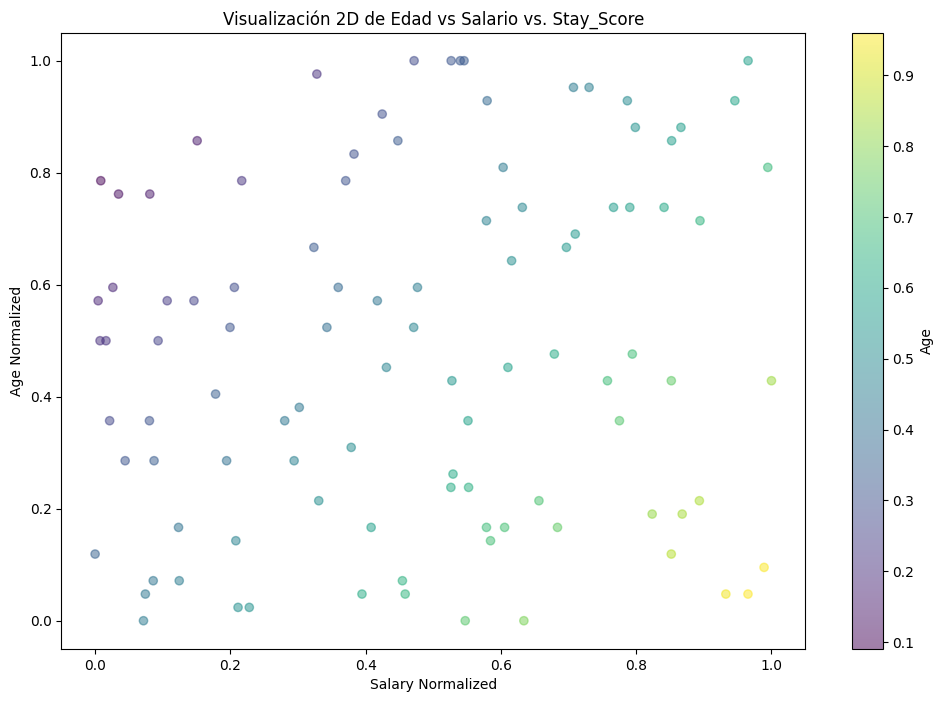

In [9]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear DataFrame (como ejemplo)
# Generamos 100 registros para simular un conjunto de datos grande
data = {
    'ID': np.arange(1, 101),  # Generamos IDs únicos del 1 al 100
    'Name': giant_names_array,  # Nombres aleatorios
    'Last Name': giant_last_name_array,  # Apellidos aleatorios
    'Age': np.random.randint(18, 61, size = 100),  # Edades aleatorias entre 18 y 60 años
    'Salary': np.random.randint(350000, 1500001, size = 100)  # Salarios aleatorios entre $350.000 y $1.500.000
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Normalización de datos
scaler = MinMaxScaler()

# Aplicamos MinMaxScaler a las columnas 'Age' y 'Salary'
df[['Age_Normalized', 'Salary_Normalized']] = scaler.fit_transform(df[['Age', 'Salary']])

# Crear una nueva columna 'Stay_Score'
df['Stay_Score'] = 0.4 * (1 - df['Age_Normalized']) + 0.6 * df['Salary_Normalized']

# Mostrar los datos preprocesados
print(df[['ID', 'Name', 'Last Name', 'Age', 'Salary', 'Stay_Score']])

# Crear la figura para ver retención por edad
plt.figure(figsize=(12, 8))

# Graficar 'Age' vs vs 'Salary Normalized' 'Stay_Score'
scatter = plt.scatter(df['Salary_Normalized'], df['Age_Normalized'], c = df['Stay_Score'], cmap = 'viridis', alpha = 0.5)
plt.colorbar(scatter, label='Age')
plt.xlabel('Salary Normalized')
plt.ylabel('Age Normalized')
plt.title('Visualización 2D de Edad vs Salario vs. Stay_Score')
plt.show()



#Explicación:
## 1. Normalización
##Descripción:

  La normalización es el proceso de ajustar los valores de las características para que caigan dentro de un rango específico, en este caso, [0, 1]. Esto se hace para que las variables tengan un rango comparable, evitando que características con diferentes escalas influyan desproporcionadamente en el análisis y modelado de datos.
  Contexto en el Código:

  En tu caso, las características Age y Salary tienen diferentes rangos y unidades. La edad varía entre 18 y 60, mientras que el salario varía entre 30,000 y 120,000.
  Utilizamos MinMaxScaler para escalar ambas características a un rango común. Esto asegura que la edad y el salario estén en la misma escala, facilitando su comparación y el ajuste del modelo.


    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    df[['Age_Normalized', 'Salary_Normalized']] = scaler.fit_transform(df[['Age', 'Salary']])

###Explicación:

MinMaxScaler ajusta los valores de las características a un rango de [0, 1] usando la fórmula:
𝑋
normalized
=
𝑋
−
𝑋
min
𝑋
max
−
𝑋
min
X
normalized
​
 =
X
max
​
 −X
min
​

X−X
min
​

​

donde
𝑋
X es el valor original,
𝑋
min
X
min
​
  es el valor mínimo de la característica, y
𝑋
max
X
max
​
  es el valor máximo.




##2. Ecuación Polinomial
### Descripción:

  La ecuación polinomial se usa para combinar las características de una manera que permita capturar relaciones no lineales entre las variables y la variable objetivo. En este caso, se calcula un Stay_Score que mide la probabilidad de permanencia.
  Contexto en el Código:

  La fórmula ponderada para Stay_Score combina la edad normalizada (invirtiéndola) y el salario normalizado con pesos específicos.
  La inversión de la edad (1 - Age_Normalized) refleja que una mayor edad debería disminuir la probabilidad de permanencia. Por otro lado, un salario más alto debería aumentar esta probabilidad, por eso se usa directamente el Salary_Normalized.

```
df['Stay_Score'] = 0.4 * (1 - df['Age_Normalized']) + 0.6 * df['Salary_Normalized']
Explicación:
```



La fórmula ponderada combina las características normalizadas con pesos:
Stay_Score
=
0.4
×
(
1
−
Age_Normalized
)
+
0.6
×
Salary_Normalized
Stay_Score=0.4×(1−Age_Normalized)+0.6×Salary_Normalized
0.4
0.4 y
0.6
0.6 son los pesos asignados a la edad y el salario, respectivamente.
La inversión de la edad normalizada se hace para que una mayor edad reduzca el Stay_Score, reflejando la lógica deseada de la permanencia.

##3. Regresión Polinomial
  ### Descripcion:

  La regresión polinomial extiende la regresión lineal para capturar relaciones no lineales entre las características y la variable objetivo. Se utilizan términos polinomiales para ajustar el modelo a los datos de manera más flexible.

# Regresion Polinomial

In [10]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Supongamos que df es tu DataFrame que contiene los datos procesados

# Seleccionar las características (X) y la variable objetivo (Y)
X = df[['Age_Normalized', 'Salary_Normalized']]
Y = df['Stay_Score']

# Dividir los datos en entrenamiento y prueba
# El 20% de los datos se reservará para la prueba y el 80% se usará para entrenamiento
# random_state asegura que los resultados sean reproducibles
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Aplicar características polinómicas (grado 2)
# PolynomialFeatures transforma las características en términos polinómicos de grado 2.
# Esto incluye términos como x1^2, x2^2 y x1*x2, permitiendo capturar relaciones no lineales.
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_poly_test = poly.transform(X_test)        # Transformar los datos de prueba usando el mismo ajuste

# Ajustar el modelo de regresión
# LinearRegression se usa para ajustar un modelo lineal a las características polinomiales.
model = LinearRegression()
model.fit(X_poly_train, Y_train)  # Ajustar el modelo a los datos de entrenamiento

# El modelo ahora está entrenado y puede ser utilizado para hacer predicciones


LinearRegression()

# Mostrar Graficos 3D

Modelo de regresión polinómica ajustado


c:\Users\USUARIO\.conda\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


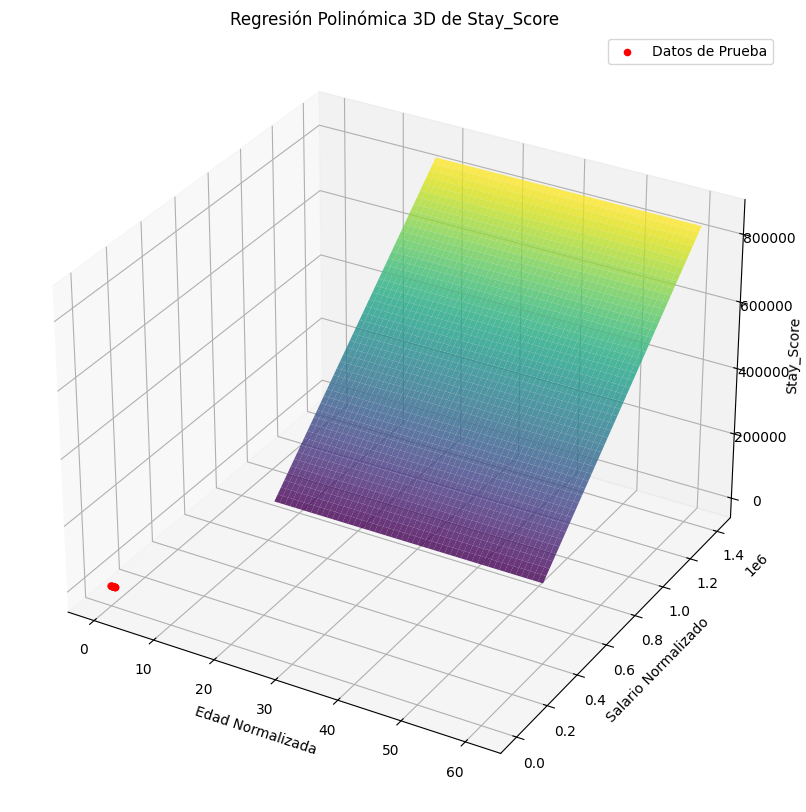

In [11]:
# Predecir en el conjunto de prueba
Y_pred = model.predict(X_poly_test)

# Evaluación del modelo
print("Modelo de regresión polinómica ajustado")

# Visualización en 3D
fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot(111, projection='3d')

# Crear malla para visualización
age_range = np.linspace(0, 1, 1000)
salary_range = np.linspace(0, 1, 1000)
age_grid, salary_grid = np.meshgrid(age_range, salary_range)
grid_points = np.c_[age_grid.ravel(), salary_grid.ravel()]

# Generar predicciones sobre la malla
grid_poly = poly.transform(grid_points)
grid_predictions = model.predict(grid_poly)
grid_predictions = grid_predictions.reshape(age_grid.shape)

# Graficar superficie
ax.plot_surface(age_grid, salary_grid, grid_predictions, cmap = 'viridis', alpha = 0.8)
ax.scatter(X_test['Age_Normalized'], X_test['Salary_Normalized'], Y_test, color = 'r', label = 'Datos de Prueba')

# Configurar etiquetas y título
ax.set_xlabel('Edad Normalizada')
ax.set_ylabel('Salario Normalizado')
ax.set_zlabel('Stay_Score')
ax.set_title('Regresión Polinómica 3D de Stay_Score')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()


# Guardar en orden en Excel

In [12]:
# Suponiendo que 'df' ya está definido y contiene los datos

# Ordenar el DataFrame por 'Stay_Score' en orden descendente
df_sorted = df.sort_values(by='Stay_Score', ascending = False)

# Crear un archivo Excel
output_file = 'sorted_stay_scores.xlsx'

# Guardar el DataFrame ordenado en un archivo Excel
df_sorted.to_excel(output_file, index = False)

print(f"El archivo Excel '{output_file}' ha sido creado con los datos ordenados por 'Stay_Score'.")

El archivo Excel 'sorted_stay_scores.xlsx' ha sido creado con los datos ordenados por 'Stay_Score'.
